# Evaluating Performance of Linear Regression 

This is the same example considered earlier for linear regression lerner. 

First we import the modules and functions that will be used in the code.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np                         
from sklearn import datasets      
from sklearn import linear_model  
from sklearn.metrics import mean_squared_error, r2_score  

diabetes = datasets.load_diabetes()
X = diabetes.data[:, np.newaxis, 2] # Select 3rd feature 'bmi' as the Feature and retain ndim=2
y = diabetes.target

## Holdout Method

First, we will use *Holdout Method* for evaluating model performance. For this purpose,
unlike in the previous example, we need to split the available data into 'training data' and 'test data' 
**at random** using the library function designed for this purpose.

### The `train_test_split` function

The `model_selection` module of Scikit Learn provides `train_test_split` function to randomly split the available data into ***training data*** and ***test data***.

In [2]:
# Conventionally 33% of the data is randomly selected as test data  
from sklearn.model_selection import train_test_split  #Function to split the data randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [3]:
X_train[:5]

array([[ 0.03798434],
       [-0.06548562],
       [-0.0816528 ],
       [-0.02129532],
       [ 0.04121778]])

Now, we select and train the `LinearRegression` learner (Estimator object, in Scikit-Learn terminology) using training dataset.

In [4]:
LReg = linear_model.LinearRegression() # LReg is the Estimator object
LReg.fit(X_train, y_train)
y_pred = LReg.predict(X_test)

print('The learned regression model is:\n')
print('Target = %.2f + %.2f*%s'%(LReg.intercept_, LReg.coef_, diabetes.feature_names[2]))
# The mean squared error for Test data
print("Test Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# Explained variance score for Test data 
print('Trest R Squared: %.2f' % r2_score(y_test, y_pred))

The learned regression model is:

Target = 151.12 + 959.73*bmi
Test Mean squared error: 4016.93
Trest R Squared: 0.32


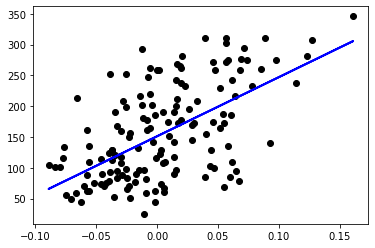

In [5]:
plt.scatter(X_test, y_test, color = 'k') 
plt.plot(X_test, y_pred, color='blue', linewidth=2) 

Of course the 'R square' value is not satisfactory in this example, 
indicating that a better learner must be determined before we deploy (start using in real applications) the learner.

Once the learner is found to be satisfactory after its evaluation, we can improve the learner by utilizing all available data for training. However, performance of this improved learner will be possoble to measure only over the period of time.

In [6]:
LRegI = linear_model.LinearRegression() # LRegI is the improved estimator 
LRegI.fit(X, y)  # Train
print('The improved regression model is:\n')
print('Target = %.2f + %.2f*%s'%(LRegI.intercept_, LRegI.coef_, diabetes.feature_names[2]))

The improved regression model is:

Target = 152.13 + 949.44*bmi


## K-Fold Cross Validation

***Cross Validation*** is a more reliable method of performance evaluation than the holdout method. We will use the `cross_validate` function to evaluate the estimator using cross validation method.

In [7]:
from sklearn.model_selection import KFold, cross_validate  #Function to compute cross validation score
LRegCV = linear_model.LinearRegression() # Instantiate the estimator
kf = KFold(6, shuffle = True)
cvResult = cross_validate (LRegCV, X, y, cv = kf) # Use kf as the cross validator
score = cvResult['test_score']
score

array([0.35132822, 0.2784392 , 0.1780815 , 0.48725858, 0.47717461,
       0.2202192 ])

The average score is taken as an estimate of the estimator's performance. 

In [8]:
performance = score.mean()
print('Average performance is %.4f.'% performance)

Average performance is 0.3321.


Thus, the trained estimator is capable of explaining 32.44% of the variation of the target. Note that 32.44% is the estimated performance of the trained estimator.

If this eatimated performance is found to be satisfactory, the estimator is trained using the entire training dataset before it is deployed.


The scores computed by `cross_validate` is determined by the `score` method of the estimator. For LinearRegression estimator the `score` method computes $R^2$ statistic (Coefficient of determination). 

To know the `score` method for other estimators, see the help on `score` method of the estimator.

### Using a scoring argument 

It is possible to use a different score than the one specified by the `score` method of the estimator. For this purpose we need to specify the `scoring` parameter in the call to `cross_validate` function. 

The specified value of `scoring` argument must be either a `scorer` object or a string specificaton of a readily available `scorer` object. 

In [9]:
cross_validate(LRegCV, X, y, cv = kf, scoring = 'neg_mean_absolute_error')

{'fit_time': array([0., 0., 0., 0., 0., 0.]),
 'score_time': array([0.        , 0.        , 0.        , 0.        , 0.01563478,
        0.        ]),
 'test_score': array([-55.21165402, -49.1359275 , -45.42705159, -55.87520137,
        -50.34010504, -56.55476979])}

The list of readily available scorer objects can be seen as shown below.

In [10]:
from sklearn.metrics import SCORERS
SCORERS.keys()  # SCORERS is a dict object

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

Its important to note that every `scorer` listed above is not suitable for every Learner.

For more information visit https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules

### Creating a custom scorer object
It is also possible to create a custom scorer object using `make_scorer` function of `sklearn.metrics` module. The scorer object created this way can be used as value for `scoring` parameter of `cross_validate`.

#### Homework

1. Explore cross-validators other than `KFold` that are available in the `model_selection` module.
2. Study the help on `make_scorer` function to understand how to develop a custom scorer object.
3. Also See `cross_val_score` function that provides a simple approach of using cross validation.